<a href="https://colab.research.google.com/github/luizhfraraujo/data_science/blob/master/CBLoL_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://gamepedia.cursecdn.com/lolesports_gamepedia_en/c/cd/CBLOL_2016_Logo.png" alt="logocblol2016"></center>

# Tratamento e Análise de dados do CBLoL - 2016 (Em Construção)

O Campeonato Brasileiro de League of Legends, o CBLoL, é o principal torneio de competição do jogo criado pela Riot Games. Sua disputa consiste em 8 times jogarem uns contra os outros em partidas 2 partidas (MD2) por final de semana na fase classificatória, MD3 nas quartas de final, seminal e final em partidas MD5. Quem ficasse em oitavo lugar na fase de classificação é rebaixado para o Circuito Desafiante (Série B) e o sexto e sétimo colocados disputariam a vaga para permanecer no CBLoL e não disputar o "Relegation", que é a disputa do sétimo colocado do CBLoL contra o segundo colocado do Circuito Desafiante. O vencedor ganharia o direito de ter uma vaga no CBLoL do próximo split. Todo ano acontecem 2 splits, um em cada semestre. O primeiro split, o vencedor disputa o Mid Season Invitation, que é uma disputa intercontinetal com os times de outras regiões. No segundo split, o vencedor disputa o campeonato mundial.


PS: Este modelo de fase classificatória foi o utilizado em 2016, a partir de 2019 o modelo foi alterado para partidas MD1, uma no sábado e outra no domingo.



**Neste notebook nos iremos analisar os dados do CBLoL 2016, que coletei na época através dos históricos das partidas disponibilizados no site da Riot Games. Estes dados foram utilizados para construção de um Dashboard de BI para estudos.**

# Obtenção dos dados

Os dados foram obtidos em 2016 através de uma API que tinha disponível no site da Riot Games, onde conseguiria através do MatchHistoryID coletar os dados via JSON e extrair as informações necessárias. Vamos analisar os seguintes arquivos:

* `match_status_players.csv` - contem os dados da partida dos jogadores
* `champions` - lista de campeões
* `match_status_teams.csv` - contem os dados das partidas


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# match_status_players.csv
df_msp = pd.read_csv("https://raw.githubusercontent.com/luizhfraraujo/analise-cblol-2016/master/data/matchs_status_players.csv")

# champions.csv
df_champions = pd.read_csv("https://raw.githubusercontent.com/luizhfraraujo/analise-cblol-2016/master/data/champions.csv")

# match_status_teams.csv
df_mst = pd.read_csv("https://raw.githubusercontent.com/luizhfraraujo/analise-cblol-2016/master/data/match_status_teams.csv")

# matchs.csv
df_matchs = pd.read_csv("https://raw.githubusercontent.com/luizhfraraujo/analise-cblol-2016/master/data/matchs.csv")



# Análise dos dados

Esta etapa tem por objetivo identificar os campos que estão em nosso CSV e permitir entender como os dados estão estruturados.

In [69]:
df_msp.head()

,id,gameId,teamId,participantId,profileIcon,summonerName,championId,highestAchievedSeasonTier,spell1Id,spell2Id,assists,champLevel,combatPlayerScore,deaths,doubleKills,firstBloodAssist,firstBloodKill,firstInhibitorAssist,firstInhibitorKill,firstTowerAssist,firstTowerKill,goldEarned,goldSpent,inhibitorKills,item0,item1,item2,item3,item4,item5,item6,killingSprees,kills,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicalDamageTaken,neutralMinionsKilled,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,objectivePlayerScore,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,quadraKills,sightWardsBoughtInGame,totalDamageDealt,totalDamageDealtToChampions,totalDamageTaken,totalHeal,totalMinionsKilled,totalPlayerScore,totalScoreRank,totalTimeCrowdControlDealt,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,unrealKills,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,lane,role
0,340145,340044,100,1,28,VFK Robo,33,UNRANKED,12,4,3,16,0,3,1,0,1,0,0,0,0,14029,13450,0,1011,3026,3512,1308,3075,3068,3363,1,5,0,5,2,00:30:02,129497,20286,13558,14,2,12,0,0,46590,4635,17581,0,0,176088,24921,31420,4376,249,0,0,00:02:20,1,0,0,0,280,3,0,2,3,16,0,TOP,SOLO
1,340146,340044,100,2,28,VFK Turtle,79,UNRANKED,4,11,3,15,0,2,0,0,0,0,0,0,0,10819,10700,0,1410,1031,3009,3742,3065,2043,3364,0,1,524,0,1,00:27:05,95874,9613,5451,88,14,74,0,0,23579,782,19788,0,0,137521,10524,25239,12299,34,0,0,00:10:36,1,0,18067,128,0,1,0,7,13,28,0,JUNGLE,NONE
2,340147,340044,100,3,28,VFK takeshi,7,UNRANKED,14,4,6,16,0,2,0,0,0,0,0,0,0,12051,11425,0,1056,3001,3285,3135,3158,1058,3340,0,0,0,0,0,00:33:41,156636,15041,5494,9,0,9,0,0,23396,1396,8539,0,0,181394,17799,14034,1788,273,0,0,00:00:56,1,0,1362,1362,0,0,0,3,4,18,0,MIDDLE,SOLO
3,340148,340044,100,4,28,VFK esA,236,UNRANKED,7,4,3,16,0,5,0,0,0,0,0,0,0,14851,14100,0,3031,3155,1038,3009,3508,3046,3363,1,3,776,2,1,00:11:14,9892,1977,4797,25,7,18,0,0,240544,20500,12417,0,0,254678,22922,17215,2688,334,0,0,00:04:52,3,0,4241,445,0,0,0,2,20,22,0,BOTTOM,DUO_CARRY
4,340149,340044,100,5,28,VFK Baiano,201,UNRANKED,3,4,7,11,0,3,0,0,0,0,0,0,0,8609,7775,0,0,3190,2303,3009,1011,1029,3364,0,0,0,0,0,00:24:30,11387,7086,7282,0,0,0,0,0,6836,749,10805,0,0,24935,7835,18087,2486,42,0,0,00:14:10,5,0,6711,0,0,0,0,7,11,40,0,BOTTOM,DUO_SUPPORT


### Dicionário dos campos do df_msp
* `id` - número identificador do registro
* `gameId` - número identificador da partida
* `teamId` - número identificador do time na partida. Será sempre 100 (lado azul do mapa) ou 200 (lado vermelho do mapa).
* `participantId` - número identificador do jogador na partida. 1 a 5 representa o lado azul do mapa, 6 a 10 lado vermelho do mapa.
* `profileIcon` - número do ícone de perfil do jogador
* `summonerName` - nome do jogador na partida
* `championId` - número identificador do campeão utilizado pelo jogador
* `highestAchievedSeasonTier` - maior posição desta conta nas partidas ranquedas
* `spell1Id` - número identificador da primeira mágia do jogador
* `spell2Id` - número identificador da segunda mágia do jogador
* `assists` -
* `champLevel` -
* `combatPlayerScore` -
* `deaths` -
* `doubleKills` -
* `firstBloodAssist` -
* `firstBloodKill` -
* `firstInhibitorAssist` -
* `firstInhibitorKill` -
* `firstTowerAssist` -
* `firstTowerKill` -
* `goldEarned` -
* `goldSpent` -
* `inhibitorKills` -
* `item0` -
* `item1` -
* `item2` -
* `item3` -
* `item4` -
* `item5` -
* `item6` -
* `killingSprees` -
* `kills` -
* `largestCriticalStrike` -
* `largestKillingSpree` -
* `largestMultiKill` -
* `longestTimeSpentLiving` -
* `magicDamageDealt` -
* `magicDamageDealtToChampions` -
* `magicalDamageTaken` -
* `neutralMinionsKilled` -
* `neutralMinionsKilledEnemyJungle` -
* `neutralMinionsKilledTeamJungle` -
* `objectivePlayerScore` -
* `pentaKills` -
* `physicalDamageDealt` -
* `physicalDamageDealtToChampions` -
* `physicalDamageTaken` -
* `quadraKills` -
* `sightWardsBoughtInGame` -
* `totalDamageDealt` -
* `totalDamageDealtToChampions` -
* `totalDamageTaken` -
* `totalHeal` -
* `totalMinionsKilled` -
* `totalPlayerScore` -
* `totalScoreRank` -
* `totalTimeCrowdControlDealt` -
* `totalUnitsHealed` -
* `tripleKills` -
* `trueDamageDealt` -
* `trueDamageDealtToChampions` -
* `trueDamageTaken` -
* `turretKills` -
* `unrealKills` -
* `visionWardsBoughtInGame` -
* `wardsKilled` -
* `wardsPlaced` -
* `win` -
* `lane` -
* `role` -

In [70]:
df_champions.head()

,id,championId,championImage,championImageLink,championName,championVersion
0,1,429,Kalista.png,http://ddragon.leagueoflegends.com/cdn/6.18.1/...,Kalista,6.18.1
1,2,2,Olaf.png,http://ddragon.leagueoflegends.com/cdn/6.18.1/...,Olaf,6.18.1
2,3,51,Caitlyn.png,http://ddragon.leagueoflegends.com/cdn/6.18.1/...,Caitlyn,6.18.1
3,4,23,Tryndamere.png,http://ddragon.leagueoflegends.com/cdn/6.18.1/...,Tryndamere,6.18.1
4,5,22,Ashe.png,http://ddragon.leagueoflegends.com/cdn/6.18.1/...,Ashe,6.18.1


### Dicionário dos campos do df_champions
* `id` -
* `championId` -
* `championImage` -
* `championImageLink` -
* `championName` -
* `championVersion` - 


In [71]:
df_mst.head()

,id,gameId,teamId,championIdBan1,championIdBan2,championIdBan3,towerKills,baronKills,dominionVictoryScore,dragonKills,firstBaron,firstBlood,firstDragon,firstInhibitor,firstRiftHerald,firstTower,inhibitorKills,riftHeraldKills,vilemawKills,win
0,340144,340044,100,268,42,48,4,0,0,4,0,1,1,0,0,0,0,0,0,Fail
1,340151,340051,100,127,33,133,8,1,0,2,1,0,1,1,0,0,2,1,0,Win
2,340153,340053,100,268,245,203,3,0,0,3,0,1,1,0,0,0,0,1,0,Fail
3,340244,340044,200,127,133,25,8,0,0,0,0,0,0,1,1,1,1,2,0,Win
4,340251,340051,200,268,201,245,6,0,0,2,0,1,0,0,1,1,0,2,0,Fail


### Dicionário dos campos do df_mst
* `id` -
* `gameId` -
* `teamId` -
* `championIdBan1` -
* `championIdBan2` -
* `championIdBan3` -
* `towerKills` -
* `baronKills` -
* `dominionVictoryScore` -
* `dragonKills` -
* `firstBaron` -
* `firstBlood` -
* `firstDragon` -
* `firstInhibitor` -
* `firstRiftHerald` -
* `firstTower` -
* `inhibitorKills` -
* `riftHeraldKills` -
* `vilemawKills` -
* `win` -

In [72]:
df_matchs.head()

,gameId,gameCreation,gameDuration,gameMode,gameType,gameVersion,mapId,gameChampioship,gameChampioshipSplit,gameChampioshipYear,game,gameNumber,gameMatch,gameMatchType,gameDate
0,340044,2016-04-02 12:02:58.386000,00:36:57,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,1,Final,MD5,NaN
1,340051,2016-04-02 13:12:10.156000,00:36:31,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,2,Final,MD5,NaN
2,340053,2016-04-02 14:25:32.358000,00:42:46,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,3,Final,MD5,NaN
3,390061,2016-07-09 12:05:47.998000,00:37:16,CLASSIC,CUSTOM_GAME,6.12.147.611,11,CBLOL,2,2016,CNB eSports x INTZ eSports,1,Final,MD5,NaN
4,390068,2016-07-09 13:21:59.243000,00:31:50,CLASSIC,CUSTOM_GAME,6.12.147.611,11,CBLOL,2,2016,CNB eSports x INTZ eSports,2,Final,MD5,NaN



### Dicionário dos campos do df_matchs
* `gameId` -
* `gameCreation` -
* `gameDuration` -
* `gameMode` -
* `gameType` -
* `gameVersion` -
* `mapId` -
* `gameChampioship` -
* `gameChampioshipSplit` -
* `gameChampioshipYear` -
* `game` -
* `gameNumber` -
* `gameMatch` -
* `gameMatchType` -
* `gameDate` -

## Q1 - Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos destas variáveis?

In [73]:
# identificar o volume de dados do DataFrame
print("Entradas de df_msp:\t {}".format(df_msp.shape[0]))
print("Variáveis de df_msp:\t {}\n".format(df_msp.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_msp.dtypes)

Entradas de df_msp:	 1280
Variáveis de df_msp:	 71



id                int64
gameId            int64
teamId            int64
participantId     int64
profileIcon       int64
                  ...  
wardsKilled       int64
wardsPlaced       int64
win               int64
lane             object
role             object
Length: 71, dtype: object

In [74]:
# identificar o volume de dados do DataFrame
print("Entradas de df_champions:\t {}".format(df_champions.shape[0]))
print("Variáveis de df_champions:\t {}\n".format(df_champions.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_champions.dtypes)

Entradas de df_champions:	 132
Variáveis de df_champions:	 6



id                    int64
championId            int64
championImage        object
championImageLink    object
championName         object
championVersion      object
dtype: object

In [75]:
# identificar o volume de dados do DataFrame
print("Entradas de df_mst:\t {}".format(df_mst.shape[0]))
print("Variáveis de df_mst:\t {}\n".format(df_mst.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_mst.dtypes)

Entradas de df_mst:	 310
Variáveis de df_mst:	 20



id                       int64
gameId                   int64
teamId                   int64
championIdBan1           int64
championIdBan2           int64
championIdBan3           int64
towerKills               int64
baronKills               int64
dominionVictoryScore     int64
dragonKills              int64
firstBaron               int64
firstBlood               int64
firstDragon              int64
firstInhibitor           int64
firstRiftHerald          int64
firstTower               int64
inhibitorKills           int64
riftHeraldKills          int64
vilemawKills             int64
win                     object
dtype: object

In [76]:
# identificar o volume de dados do DataFrame
print("Entradas de df_matchs:\t {}".format(df_matchs.shape[0]))
print("Variáveis de df_matchs:\t {}\n".format(df_matchs.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_matchs.dtypes)

Entradas de df_matchs:	 155
Variáveis de df_matchs:	 15



gameId                    int64
gameCreation             object
gameDuration             object
gameMode                 object
gameType                 object
gameVersion              object
mapId                     int64
gameChampioship          object
gameChampioshipSplit      int64
gameChampioshipYear       int64
game                     object
gameNumber                int64
gameMatch                object
gameMatchType            object
gameDate                float64
dtype: object

In [0]:
# #@title Selecione um jogador para visualizar seus dados {run: "auto"}
# player_name = "Professor" #@param ["Brtt", "Professor", "Esa"]

## Q2 - Quantos dados ausentes temos em nosso conjunto de dados?

A qualidade do dataset está relacionado a quantidade de valores ausentes. Precisamos entender logo de início se valores nulos são significativos para nossa análise.

Podemos ver no trecho abaixo que não possuímos nenhuma coluna com dados ausentes.

In [78]:
print("Dados ausentes de df_msp")
(df_msp.isnull().sum() / df_msp.shape[0]).sort_values(ascending=False)

Dados ausentes de df_msp


role                      0.0
item1                     0.0
firstTowerAssist          0.0
firstTowerKill            0.0
goldEarned                0.0
                         ... 
physicalDamageTaken       0.0
quadraKills               0.0
sightWardsBoughtInGame    0.0
totalDamageDealt          0.0
id                        0.0
Length: 71, dtype: float64

In [79]:
print("Dados ausentes de df_champions")
(df_champions.isnull().sum() / df_champions.shape[0]).sort_values(ascending=False)

Dados ausentes de df_champions


championVersion      0.0
championName         0.0
championImageLink    0.0
championImage        0.0
championId           0.0
id                   0.0
dtype: float64

In [80]:
print("Dados ausentes de df_mst")
(df_mst.isnull().sum() / df_mst.shape[0]).sort_values(ascending=False)

Dados ausentes de df_mst


win                     0.0
vilemawKills            0.0
gameId                  0.0
teamId                  0.0
championIdBan1          0.0
championIdBan2          0.0
championIdBan3          0.0
towerKills              0.0
baronKills              0.0
dominionVictoryScore    0.0
dragonKills             0.0
firstBaron              0.0
firstBlood              0.0
firstDragon             0.0
firstInhibitor          0.0
firstRiftHerald         0.0
firstTower              0.0
inhibitorKills          0.0
riftHeraldKills         0.0
id                      0.0
dtype: float64

In [81]:
print("Dados ausentes de df_matchs")
(df_matchs.isnull().sum() / df_matchs.shape[0]).sort_values(ascending=False)

Dados ausentes de df_matchs


gameDate                1.0
gameMatchType           0.0
gameMatch               0.0
gameNumber              0.0
game                    0.0
gameChampioshipYear     0.0
gameChampioshipSplit    0.0
gameChampioship         0.0
mapId                   0.0
gameVersion             0.0
gameType                0.0
gameMode                0.0
gameDuration            0.0
gameCreation            0.0
gameId                  0.0
dtype: float64

Podemos verificar que o dataframe base para a análise dos outros dataframes é o df_matchs. Por isto, vamos começar extraindo os dados chaves deste dataframe.

In [82]:
df_matchs.head()

,gameId,gameCreation,gameDuration,gameMode,gameType,gameVersion,mapId,gameChampioship,gameChampioshipSplit,gameChampioshipYear,game,gameNumber,gameMatch,gameMatchType,gameDate
0,340044,2016-04-02 12:02:58.386000,00:36:57,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,1,Final,MD5,NaN
1,340051,2016-04-02 13:12:10.156000,00:36:31,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,2,Final,MD5,NaN
2,340053,2016-04-02 14:25:32.358000,00:42:46,CLASSIC,CUSTOM_GAME,6.5.0.283,11,CBLOL,1,2016,Keyd Stars x INTZ eSports,3,Final,MD5,NaN
3,390061,2016-07-09 12:05:47.998000,00:37:16,CLASSIC,CUSTOM_GAME,6.12.147.611,11,CBLOL,2,2016,CNB eSports x INTZ eSports,1,Final,MD5,NaN
4,390068,2016-07-09 13:21:59.243000,00:31:50,CLASSIC,CUSTOM_GAME,6.12.147.611,11,CBLOL,2,2016,CNB eSports x INTZ eSports,2,Final,MD5,NaN


# Tratamento dos dados

Vamos agora iniciar o tratamento dos dados para obter um melhor resultado em nossa análise

In [83]:
# Vamos remover algumas colunas
df_matchs_clean = df_matchs.drop(columns=["gameMode", "game", "gameType","gameVersion","mapId","gameChampioship", "gameChampioshipYear", "gameDate"])

#alterar o formato de gameCreation para data somente
df_matchs_clean[["gameCreationDate", "gameCreationTime"]] = df_matchs_clean.gameCreation.str.split(expand=True)

#vamos remover os milisegundos do gameCreationTime
df_matchs_clean[["gameCreationTime"]] = df_matchs_clean.gameCreationTime.str.slice(stop=8)

#Remover o campo gameCreation
df_matchs_clean = df_matchs_clean.drop(columns=["gameCreation"])

df_matchs_clean.head()

,gameId,gameDuration,gameChampioshipSplit,gameNumber,gameMatch,gameMatchType,gameCreationDate,gameCreationTime
0,340044,00:36:57,1,1,Final,MD5,2016-04-02,12:02:58
1,340051,00:36:31,1,2,Final,MD5,2016-04-02,13:12:10
2,340053,00:42:46,1,3,Final,MD5,2016-04-02,14:25:32
3,390061,00:37:16,2,1,Final,MD5,2016-07-09,12:05:47
4,390068,00:31:50,2,2,Final,MD5,2016-07-09,13:21:59


Nosso base dataframe está quase criado. Uma informação importante que não possui neste dataframe é a de qual time ganhou a partida. Se olharmos o nosso df_mst, temos o **teamId** e o **win**, mas o campo teamId me retorna o id do lado do mapa do time, e não o nome dele. Para isto vamos precisar extrair a informações do df_msp, que contem os nomes dos jogadores e, antes do nickname do jogador, possui uma flag com a abreviação do time.

In [84]:
#copiando os dados do df_msp para fazer um group by e coletar qual time ganhou
df_matchs_teams = df_msp[["gameId", "teamId", "summonerName", "win"]].copy()

df_matchs_teams["team"] = df_matchs_teams.summonerName.str.slice(stop=3)

df_matchs_teams.drop(columns=["summonerName"], inplace=True)

#removendo os registros os duplicando
df_matchs_teams.drop_duplicates(inplace=True)
df_matchs_teams["side"] = ""

# aqui vamos percorrer as partidas e adicionar a tag Blue e Red para os lados do mapa, com base no teamId
for index, row in df_matchs_teams.iterrows():
  if row["teamId"] == 100:
    df_matchs_teams.at[index, "side"] = "Blue"
  else:
    df_matchs_teams.at[index, "side"] = "Red"

df_matchs_teams_winners = df_matchs_teams.where(df_matchs_teams["win"]==1)
df_matchs_teams_winners.dropna(inplace=True)

df_matchs_teams_losers = df_matchs_teams.where(df_matchs_teams["win"]==0)
df_matchs_teams_losers.dropna(inplace=True)

#vamos fazer uma configuração nas variáveis pois por algum motivo elas foram alteradas para numeric
df_matchs_teams_winners["gameId"] = df_matchs_teams_winners["gameId"].astype(int)
df_matchs_teams_winners["teamWinnerSide"] = df_matchs_teams_winners["side"]
df_matchs_teams_winners["teamWinner"] = df_matchs_teams_winners["team"]

df_matchs_teams_winners.drop(columns=["win","teamId","team", "side"], inplace=True)

df_matchs_teams_losers["gameId"] = df_matchs_teams_losers["gameId"].astype(int)
df_matchs_teams_losers["teamLooserSide"] = df_matchs_teams_losers["side"]
df_matchs_teams_losers["teamLooser"] = df_matchs_teams_losers["team"]

df_matchs_teams_losers.drop(columns=["win","teamId","team", "side"], inplace=True)

# vamos agora concatenar os valores de df_matchs_teams em df_matchs_clean
df1_matchs = pd.merge(df_matchs_teams_winners,df_matchs_teams_losers,left_on=['gameId'], right_on = ['gameId'], how = 'left')

df_matchs_new = pd.merge(df_matchs_clean,df1_matchs,left_on=['gameId'], right_on = ['gameId'], how = 'left')

display(df_matchs_new)

,gameId,gameDuration,gameChampioshipSplit,gameNumber,gameMatch,gameMatchType,gameCreationDate,gameCreationTime,teamWinnerSide,teamWinner,teamLooserSide,teamLooser
0,340044,00:36:57,1,1,Final,MD5,2016-04-02,12:02:58,Red,ITZ,Blue,VFK
1,340051,00:36:31,1,2,Final,MD5,2016-04-02,13:12:10,Blue,ITZ,Red,VFK
2,340053,00:42:46,1,3,Final,MD5,2016-04-02,14:25:32,Red,ITZ,Blue,VFK
3,390061,00:37:16,2,1,Final,MD5,2016-07-09,12:05:47,Blue,ITZ,Red,CNB
4,390068,00:31:50,2,2,Final,MD5,2016-07-09,13:21:59,Red,CNB,Blue,ITZ
...,...,...,...,...,...,...,...,...,...,...,...,...
150,1450313,00:52:02,2,4,Série de Promoção,MD5,2016-07-23,14:54:30,Red,RED,Blue,GEN
151,1460193,00:28:40,2,1,Série de Promoção,MD5,2016-07-22,12:03:28,Red,OPK,Blue,ECG
152,1460198,00:32:32,2,2,Série de Promoção,MD5,2016-07-22,12:55:09,Blue,OPK,Red,ECG
153,1460202,00:34:57,2,3,Série de Promoção,MD5,2016-07-22,13:48:28,Red,ECG,Blue,OPK


Agora temos os dados das partidas, juntamente com o time que ganhou e perdeu. Vamos agora analisar estas informações


# Analisando os dados das partidas

Vamos agora analisar os dados referentes aos times, com base na extração que fizemos dos dataframes anteriores.


## Q1 - Quais são os tipos de partidas e a taxa de vitórias por lado do mapa?

Vencedores por tipo de partida e lado do mapa


gameMatchType  teamWinnerSide
MD2            Blue              57
               Red               55
MD5            Blue              17
               Red               14
MD3            Blue               9
               Red                3
Name: teamWinnerSide, dtype: int64

---------------------------------------
Vencedores por split e lado do mapa


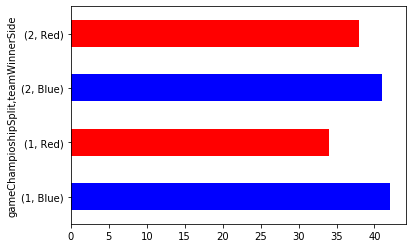

In [85]:
df_q1 = df_matchs_new[["gameId", "gameDuration", "teamWinnerSide","teamWinner", "gameChampioshipSplit", "gameMatch", "gameMatchType"]].copy()

df_q1["gameDurationFormat"] = np.array(pd.to_datetime(df_q1['gameDuration']), dtype=np.datetime64)
df_q1.gameDurationFormat = pd.to_numeric(df_q1.gameDurationFormat)

# Média de tempo de todas as partidas, dos 2 splits
# pd.to_datetime(np.median(df_q1.gameDurationFormat))
print("Vencedores por tipo de partida e lado do mapa")
display(df_q1.groupby(["gameMatchType"]).teamWinnerSide.value_counts().sort_values(ascending=False))
print("---------------------------------------")
print("Vencedores por split e lado do mapa")


df_q1.groupby(["gameChampioshipSplit"]).teamWinnerSide.value_counts().plot.barh(color=["blue","red"])


# display(df_q1.groupby(["gameChampioshipSplit"]).teamWinnerSide.value_counts())

Podemos identificar na lista acima que o lado azul do mapa possui o maior índice de vitórias em todos os tipos de partidas, em ambos os splits. Seria pela posição do mapa? Podemos ver na imagem abaixo que aparentemente a visão do mapa é melhor para quem está atacando pelo lado azul (lado de baixo), visto que o movimento dele seria da esquerda para a direita, e teria uma visualização de movimento mais "horizontal", enquanto do lado direito seria mais vertical. Curiosamente, a posição do mapa no jogo fica do lado inferior direito, facilitando assim o a visão de movimento do jogador que está pela rota de baixo pois quando ele clica para se movimentar, teoricamente estaria indo para a direita, levando assim seu mouse e observando o mapa.

<center>
<img src="https://ae01.alicdn.com/kf/HTB1hvDOLVXXXXX8XpXXq6xXFXXXb/Lol-Summoner-do-Rift-mapa-LOL-jogo-Team-Tactical-Map-Poster-DIY-Summoner-Rift-mapa.jpg"></center>


## Q2 - Qual a média de tempo de partida dos times vencedores na fase classificatória?

Na questão anterior adicionamos um campo numérico com o nome de gameDurationFormat. Vamos utilizar este campo agora para realizar o cálculo

In [94]:
# primeiro vamos confirmar qual time venceu cada split
df_game_final = df_q1.where(df_q1['gameMatch'] == 'Final').copy()
df_game_final.dropna(inplace=True)
display(df_game_final.groupby(["teamWinner","gameChampioshipSplit"]).gameMatch.value_counts())

teamWinner  gameChampioshipSplit  gameMatch
CNB         2.0                   Final        1
ITZ         1.0                   Final        3
            2.0                   Final        3
Name: gameMatch, dtype: int64

Podemos ver que a INTZ ganhou os dois splits, perdendo apenas 1 partida no split 2.

In [87]:
df_game_duration = df_q1.where(df_q1['gameMatch'] == 'Fase de Grupos').copy()
df_game_duration.dropna(inplace=True)
df_game_duration['gameDurationFormat'] = df_game_duration['gameDurationFormat'].astype(int)
df_game_duration['gameChampioshipSplit'] = df_game_duration['gameChampioshipSplit'].astype(int)
df_game_duration.drop(columns=["gameId", "gameDuration", "teamWinnerSide", "gameMatchType"],inplace=True)

df_gd_median = pd.DataFrame({'gameDurationMedian' : df_q1.groupby(["teamWinner","gameChampioshipSplit"]).gameDurationFormat.median()}).reset_index()
df_gd_median["gameDurationMedian"] = pd.to_datetime(df_gd_median.gameDurationMedian).astype(str)
df_gd_median[["gameDurationDate", "gameDuration"]] = df_gd_median.gameDurationMedian.str.split(expand=True)
df_gd_median.drop(columns=["gameDurationDate", "gameDurationMedian"],inplace=True)

display(df_gd_median.sort_values(by="gameDuration",ascending=False))

,teamWinner,gameChampioshipSplit,gameDuration
9,OPK,1,00:47:42.500
0,BGG,2,00:47:29.000
17,g3x,1,00:44:32.000
14,RED,2,00:43:47.000
13,RED,1,00:43:24.000
11,PNG,1,00:43:01.000
1,CNB,1,00:42:29.000
7,KBM,1,00:41:15.000
8,KBM,2,00:39:53.500
5,ITZ,1,00:39:17.500


Podemos ver que a OPK ocupa tanto o primeiro quanto o último lugar na lista, e vamos lembrar que esta lista mostra somente as vitórias. Vemos então que a OPK teve maior dificuldade em finalizar as suas partidas no primeiro split, em compensação no segundo ela conseguiu finalizar as suas partidas 16m abaixo da média anterior. Podemos ver que a INTZ, vencedora dos dois splits, teve quase 4 minutos de ganho de média de performance de um split para o outro na fase de grupos em suas vitórias.

**Continua....**

In [0]:
# # Listando todas as siglas

# df_matchs_teams["team"].unique()

# teams_names = {
#     'team': ['ITZ', 'CNB', 'OPK', 'VFK', 'KBM', 'PNG', 'RED', 'g3x', 'BGG',
#        'GEN', 'ECG'],
#     'teamName': ['INTZ eSports', 'CNB eSports', 'Operation Kino', 'Keyd Stars', 'KaBuM eSports', 'paiN Gaming', 'Red Canids', 'G3nerationX', 'Big Gods eSports',
#        'Team Genesis', 'ECHAMP Gaming']
# }
# df1 = pd.DataFrame(teams_names, columns= ['team','teamName'])

# df_matchs = pd.merge(df_matchs_new, df1, left_on=['team'], right_on = ['team'], how = 'left')

# display(df_matchs)